## Handling Missing Values
[Referensi Bacaan](https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc)

### DATA DICTIONARY

Suburb: Pinggir Kota

Address: Alamat

Rooms: Jumlah Kamar

Price: Harga dalam satuan AUD

Method:  
S - property sold; Properti Terjual  
SP - property sold prior; Properti Terjual sebelum auction  
PI - property passed in; Bid lebih rendah dari threshold yg dipasang vendor  
PN - sold prior not disclosed;  terjual sebelum auction dan tidak di publikasikan harganya  
SN - sold not disclosed; Terjual dan harga tidak dipublikasikan  
VB - vendor bid; vendor membuat penawaran  
W - withdrawn prior to auction; mengundurkan diri dari Auction  
SA - sold after auction; Terjual Setelah Auction berakhir  
SS - sold after auction price not disclosed. Terjual setelah auction dan harga tidak dipublikasikan   

Type:

h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;


SellerG: Real Estate Agent

Date: Tanggal Terjual

Distance: Jarak dari CBD dalam Kilometer

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Jumlah properti yang ada di suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Jumlah kamar mandi

Car: Jumlah garasi mobil

Landsize: Luas Tanah dalam Metres

BuildingArea: Luas Bangunan dalam Metres

YearBuilt: Tahun Rumah dibuat

CouncilArea: Governing council for the area

Lattitude: Self explanatory

Longtitude: Self explanatory

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Read Data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv', parse_dates=['Date']) # Agar Column Date menjadi Datetime

In [3]:
pd.options.display.max_columns = 999 # agar tampil semua kolom

In [4]:
df.head() # 5 data teratas

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
# menampilkan jumlah kolom dan baris

print("Jumlah kolom :", df.shape[1])
print("Jumlah baris :", df.shape[0]) 

Jumlah kolom : 21
Jumlah baris : 34857


## Describe Data

In [6]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

,Features,D types,Null,Null%,Unique,Unique Value
0,Suburb,object,0,0.00,351,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,0.00,34009,"[68 Studley St, 85 Turner St, 25 Bloomburg St,..."
2,Rooms,int64,0,0.00,12,"[2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]"
3,Type,object,0,0.00,3,"[h, u, t]"
4,Price,float64,7610,21.83,2871,"[nan, 1480000.0, 1035000.0, 1465000.0, 850000...."
5,Method,object,0,0.00,9,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
6,SellerG,object,0,0.00,388,"[Jellis, Biggin, Rounds, Nelson, Collins, Ding..."
7,Date,datetime64[ns],0,0.00,78,"[2016-03-09T00:00:00.000000000, 2016-03-12T00:..."
8,Distance,float64,1,0.00,215,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,1,0.00,211,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


- Berdasarkan data diatas, terlihat kolom target memiliki missing values sebesar 7610 data atau sekitar 21.8% dari total data. Untuk itu, dropna pada missing values pada kolom target akan dilakukan.
- Kolom Bedroom2 seperti yang sudah dicantumkan diatas memiliki informasi yang sama dengan rooms sifatnya hanya tambahan, maka drop columns akan dilakukan terhadap kolom Bedroom2
- Untuk kolom-kolom lain yang memiliki missing values akan dihandle dengan mengelompokkan nya berdasarkan jumlah Nan nya terlebih dahulu agar lebih mudah untuk memikirkan langkah yang akan diambil selanjutnya.
- Terlihat juga data types tiap kolom sudah sesuai dengan jenis valuesnya, untuk kolom date sudah dilakukan perubahan menjadi datetime64 pada saat membaca data.

In [7]:
# Descriptive stats
df.describe().T

# Terlihat adanya min 0 values di kolom distance, car, bathroom, Landsize dan BuildingArea
# Untuk distance karena memang ini jarak rumah ke area cbd dalam km jadi sangat normal jika ada 0 values
# begitu pula dengan car karena isi kolom merupakan ketersediaan lahan parkir jadi 0 memiliki arti tidak ada space untuk parkir mobil.
# Akan dilakukan pengecekan lebih lanjut ke kolom bathroom, Landsize dan BuildingArea

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [8]:
# Descriptive statistic for object types
df.describe(include='O').T

# Most frequent of Suburb is Reservoir and majority of house type is h, most sales done by seller Jellis

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


## Handling Missing Values

### DROPNA

In [9]:
# Drop rows missing values dari kolom target (price)

df.drop(df.loc[df['Price'].isna()].index, inplace=True)

In [10]:
df.loc[df['Price'].isna()]

# Cek ulang untuk memastikan sudah di drop

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [11]:
# Drop columns Bedroom2 karena memiliki informasi yang sama seperti Rooms

df.drop(columns=['Bedroom2'], axis=1, inplace=True)

In [12]:
# re-check columns
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [13]:
# Dropna Distance, Postcode, CouncilArea, Regionname, Propertycount missing values (Missing values hanya dibawah 5)

df.drop(df.loc[df['Distance'].isna()].index, inplace=True)
df.drop(df.loc[df['Postcode'].isna()].index, inplace=True)
df.drop(df.loc[df['CouncilArea'].isna()].index, inplace=True)
df.drop(df.loc[df['Regionname'].isna()].index, inplace=True)
df.drop(df.loc[df['Propertycount'].isna()].index, inplace=True)

In [14]:
# resetting the index
df.reset_index(inplace=True, drop=True)

In [15]:
df.isna().sum()

# Check column yang sudah di dropna diatas

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64

### Impute/Fillna

Columns dengan Nan% lebih dari 50%
#### Landsize

In [16]:
df.loc[(df['BuildingArea'].isna()) & (df['Landsize'].isna())]

# Setelah melihat column Building Area dan Landsize yang Nan, untuk mengisi missing valuesnya perlu untuk melihat dari rata2 BuildingArea dan LandSize dari daerahnya terlebih dahulu.
# Karena jumlah unique postcode mencapai puluhan ribu dan suburb mencapai ratusan, maka saya memilih daerah berdasarkan CouncilArea yang berjumlah 33 dan tidak ada missing values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27228,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27233,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [17]:
ps= df.loc[(df['BuildingArea'].isna()) & (df['Landsize'].isna()),'CouncilArea'].unique()

# Store ke variabel, CouncilArea daerah rumah yang landsize dan building sizenya Nan

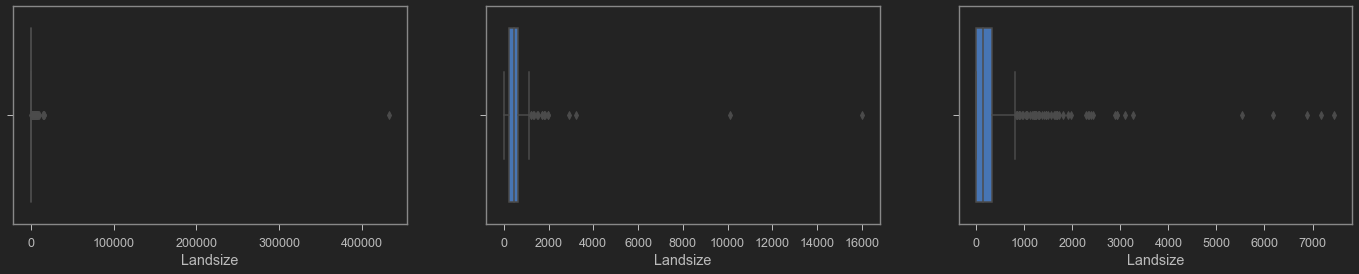

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[0]),'Landsize'], ax=axes[0]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[1]),'Landsize'], ax=axes[1]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[2]),'Landsize'], ax=axes[2]);
plt.show()

# Karena banyak outliers pada landsize di setiap Council Area maka akan melakukan fillna dengan median

In [19]:
mask = (df['Landsize'].isna()) # dimasukkan ke variable agar lebih praktis sedikit
# df.loc[(df['Postcode']==ps[1]) & (df['Rooms']==1)]

In [20]:
for i in range(len(ps)):
    for j in range(1,df['Rooms'].nunique()+1):
        if len(df[df['Rooms']==j]) == 0:
                  continue
        else:
                  df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Rooms']==j), 'Landsize'] = df.loc[(df['CouncilArea']==ps[i]) & mask & (df['Rooms']==j), 'Landsize'].fillna(df.loc[(df['CouncilArea']==ps[i]) & (df['Rooms']==j), 'Landsize'].median())
    
# Mengisi Missing value Landsize dengan median berdasarkan nilai median Landsize dari tiap CouncilArea dan tiap room per rumah

In [21]:
print(f"Missing Value yang tersisa: {df['Landsize'].isna().sum()}")

# Tersisa 24 Missing Values Landsize

Missing Value yang tersisa: 24


In [22]:
r1=df.loc[(df['Landsize'].isna()),'Rooms'].unique()
for i in r1:
    df.loc[(df['Rooms']==i)& (df['Landsize'].isna()),'Landsize'] = df.loc[(df['Rooms']==i)& (df['Landsize'].isna()),'Landsize'].fillna(df.loc[df['Rooms']==i,'Landsize'].median())

# Fillna Landsize dengan median berdasarkan jumlah kamarnya

In [23]:
# Check ulang hasil fillna
print(f"Landsize Rumah dengan jumlah kamar 9: {df.loc[(df['Rooms']==9),'Landsize']}\n")
print(f"Landsize Rumah dengan jumlah kamar 16: {df.loc[(df['Rooms']==16),'Landsize']}")
df.loc[(df['Landsize'].isna())]

# Rumah dengan kamar 9 dan 16 hanya berjumlah 1 dan isi Nan, karena tidak ada informasi lain makan akan di drop

Landsize Rumah dengan jumlah kamar 9: 5801   NaN
Name: Landsize, dtype: float64

Landsize Rumah dengan jumlah kamar 16: 20529   NaN
Name: Landsize, dtype: float64


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5801,Oakleigh South,17 Windsor Av,9,h,1380000.0,S,Ray,2016-10-09,14.7,3167.0,NaN,NaN,NaN,NaN,NaN,Kingston City Council,NaN,NaN,South-Eastern Metropolitan,3692.0
20529,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,2017-10-28,17.2,3132.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [24]:
df.drop(df.loc[df['Landsize'].isna()].index, inplace=True)
# Drop 2 row data tadi

In [25]:
df.reset_index(inplace=True,drop=True)
df.loc[(df['Landsize'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


#### Building Size

In [26]:
# Check Buildiing size missing values
df.loc[(df['BuildingArea'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,176.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,135.0,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27232,Wollert,10 Alma Rd,4,h,630000.0,SP,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,388.0,NaN,NaN,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0
27234,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
27236,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
27237,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0


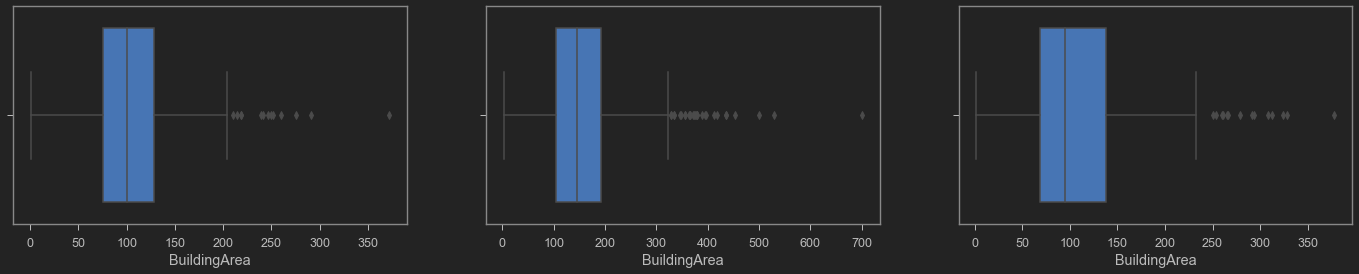

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[0]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[0]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[1]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[1]);
sns.boxplot(x=df.loc[(df['CouncilArea']==ps[2]) & (df['BuildingArea']>0)]['BuildingArea'], ax=axes[2]);
plt.show()

# Pada Building size juga terdeteksi outliers maka fillna akan dilakukan dengan median

In [28]:
# df.loc[(df['CouncilArea']=='Yarra City Council') & (df['Landsize']>=0) & (df['Landsize']<100) & (df['BuildingArea'].isna())]

In [29]:
# ps1 = df.loc[(df['BuildingArea'].isna()), 'CouncilArea'].unique()
oz = np.arange(0,10000, 100)
for j in range(len(oz)):
    df.loc[(df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+100) & (df['BuildingArea'].isna()), 'BuildingArea'] = df.loc[(df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+100) & (df['BuildingArea'].isna()), 'BuildingArea'].fillna(df.loc[(df['Landsize']>=oz[j]) & (df['Landsize']<oz[j]+100),'BuildingArea'].median())

# Memfillna Building Area dengan median berdasarkan range landsize

In [30]:
df.loc[(df['BuildingArea'].isna())]

# Masih tersisa 36 missing values di Building Area, karena range landsize nya lebih dari yang saya masukkan atau dalam range landsize diatas tidak tersedia nilai mediannya karena range terlalu kecil

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
919,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,2016-08-28,9.2,3104.0,1.0,2.0,75100.0,NaN,NaN,Boroondara City Council,-37.80020,145.07000,Southern Metropolitan,7809.0
2717,Collingwood,4/170 Oxford St,3,u,950000.0,S,Jellis,2017-04-03,1.6,3066.0,2.0,1.0,15900.0,NaN,NaN,Yarra City Council,-37.80350,144.98500,Northern Metropolitan,4553.0
3189,Essendon North,1 Dudley St,3,h,1425000.0,S,McGrath,2017-02-25,9.4,3041.0,2.0,2.0,10100.0,NaN,NaN,Moonee Valley City Council,-37.73760,144.89540,Western Metropolitan,1308.0
3404,Footscray,13/2 Saltriver Pl,3,u,674000.0,S,Jellis,2017-11-02,6.4,3011.0,2.0,1.0,8680.0,NaN,NaN,Maribyrnong City Council,-37.80160,144.90820,Western Metropolitan,7570.0
4028,Hawthorn,16/557 Glenferrie Rd,1,u,335000.0,VB,Jellis,2016-10-09,4.6,3122.0,1.0,1.0,3132.0,NaN,NaN,Boroondara City Council,-37.82760,145.03420,Southern Metropolitan,11308.0
4103,Hawthorn,18/508 Glenferrie Rd,2,u,695000.0,S,Jellis,2016-07-26,4.6,3122.0,1.0,1.0,3194.0,NaN,NaN,Boroondara City Council,-37.83050,145.03410,Southern Metropolitan,11308.0
5033,Maribyrnong,44/2 Horizon Dr,2,u,495000.0,S,Brad,2017-03-18,8.7,3032.0,2.0,2.0,37000.0,NaN,NaN,Maribyrnong City Council,-37.77520,144.89250,Western Metropolitan,4918.0
6009,Port Melbourne,36/3 Seisman Pl,2,u,1340000.0,VB,Chisholm,2016-03-12,3.8,3207.0,2.0,2.0,21700.0,NaN,2000.0,Melbourne City Council,-37.84240,144.94490,Southern Metropolitan,8648.0
6649,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,2016-04-23,11.2,3073.0,1.0,2.0,41400.0,NaN,NaN,Darebin City Council,-37.71040,145.02570,Northern Metropolitan,21650.0
7131,South Yarra,413/35 Malcolm St,1,u,315000.0,PI,hockingstuart,2016-03-12,3.3,3141.0,1.0,0.0,14500.0,NaN,2011.0,Melbourne City Council,-37.83720,144.99630,Southern Metropolitan,14887.0


In [31]:
fillit = df.loc[(df['BuildingArea']>0),'BuildingArea'].median()
df.loc[(df['BuildingArea'].isna()),'BuildingArea'] = df.loc[(df['BuildingArea'].isna()),'BuildingArea'].fillna(fillit)

# mengisi sisa missing values Building area dengan nilai median.

In [32]:
df['BuildingArea'].isna().sum() # check ulang missing values di building Area

0

In [33]:
ps1= df['CouncilArea'].unique()

In [34]:
print('Sisa Nan',df.loc[ (df['Landsize'].isna()),"Landsize"].isna().sum())
list_council = df.loc[ (df['Landsize'].isna()),'CouncilArea'].unique()
for i in list_council:
    df.loc[ (df['Landsize'].isna()),'Landsize'] = df.loc[ (df['Landsize'].isna()),'Landsize'].fillna(df.loc[ (df['CouncilArea']==i),'Landsize'].median())
    
# fillna sisa nan pada landsize dengan median 

Sisa Nan 0


In [35]:
df.isna().sum()

# Check missing values di features2 lain

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6443
Car               6820
Landsize             0
BuildingArea         0
YearBuilt        15158
CouncilArea          0
Lattitude         6250
Longtitude        6250
Regionname           0
Propertycount        0
dtype: int64

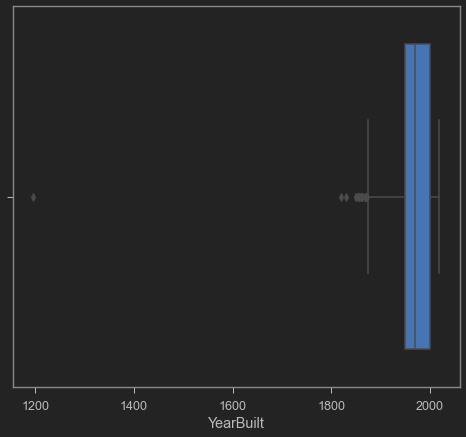

In [36]:
sns.boxplot(x=df['YearBuilt']);

# Melihat Boxplot dari Yearbuilt
# Terlihat adanya outliers, ada data dimana rumah tahun dibangunnya dibawah tahun 1200, Negara Australia sendiri ditemukan tahun 1788 jadi ini bisa dipastikan kesalahan pada data dan akan direplace dengan median beradasarkan council area

In [37]:
df.loc[(df['YearBuilt']<1250), 'YearBuilt'] = df.loc[df['CouncilArea']=='Monash City Council','YearBuilt'].median()

# akan direplace dengan median berdasarkan council area

In [38]:
df.loc[df['YearBuilt']<1250]
# Check kembali data yang di replace

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [39]:
df.loc[df['YearBuilt'].isna()]

# CHeck Missing Values di Year Built

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,123.105,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,74.000,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,103.000,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,176.0,103.000,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,135.0,103.000,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27232,Wollert,10 Alma Rd,4,h,630000.0,SP,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,388.0,133.000,NaN,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0
27234,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,2018-02-24,25.5,3750.0,2.0,2.0,375.0,133.000,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
27236,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,123.105,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
27237,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,145.000,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0


In [40]:
mask4 = (df['YearBuilt'].isna())
# Buat variable untuk store kondisi, agar lebih rapi dalam penulisan code

In [41]:
for i in ps1:
    df.loc[(df['CouncilArea']==i) & mask4, 'YearBuilt'] = df.loc[(df['CouncilArea']==i) & mask4, 'YearBuilt'].fillna(df.loc[(df['CouncilArea']==i), 'YearBuilt'].median())

# Fillna dengan median berdasarkan tiap Council Area nya

In [42]:
df.isna().sum()

# Check ulang missing values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom         6443
Car              6820
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        6250
Longtitude       6250
Regionname          0
Propertycount       0
dtype: int64

In [43]:
# Cek Missing Values di Bathroom
df.loc[df['Bathroom'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,176.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,0.0,74.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,NaN,NaN,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27226,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,NaN,NaN,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27227,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,NaN,NaN,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27231,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,NaN,NaN,0.0,74.0,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [44]:
bath_na = (df['Bathroom'].isna())
for i in ps1:
    for j in df.loc[df['Bathroom'].isna(),'Rooms'].unique():
        df.loc[(df['CouncilArea']==i) & (df['Rooms']==j) & bath_na,'Bathroom'] = df.loc[(df['CouncilArea']==i) & (df['Rooms']==j) & bath_na,'Bathroom'] .fillna(df.loc[(df['CouncilArea']==i) & (df['Rooms']==j),'Bathroom'].median())

# Fillna dengan nilai median bathroom berdasarkan Council Area dan jumlah kamarnya

In [45]:
df.loc[df['Bathroom'].isna()]

# Sisa 14 Missing Values karena tidak ditemukan nilai median dari council area dan jumlah kamarnya.
# Maka akan di fill berdasarkan jumlah kamar saja

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3752,Glenroy,6 Pengana Av,6,h,1035000.0,S,Nelson,2016-06-27,13.0,3046.0,NaN,NaN,727.00,169.5,1960.0,Moreland City Council,NaN,NaN,Northern Metropolitan,8870.0
5847,Parkville,42 Park Dr,8,u,3210000.0,S,Kelly,2016-10-12,2.6,3052.0,NaN,NaN,791.00,169.5,1975.0,Melbourne City Council,NaN,NaN,Northern Metropolitan,2309.0
5853,Parkville,84 Flemington Rd,10,h,2800000.0,VB,Nelson,2016-04-16,2.6,3052.0,NaN,NaN,612.00,164.0,1975.0,Melbourne City Council,-37.7889,144.9421,Northern Metropolitan,2309.0
9452,Altona North,60 Rosala Av,7,h,1130000.0,S,Jas,2017-05-20,11.1,3025.0,NaN,NaN,671.75,164.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5132.0
10081,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,2017-05-20,4.6,3122.0,NaN,NaN,960.00,191.5,1960.0,Boroondara City Council,-37.8303,145.0367,Southern Metropolitan,11308.0
14785,Fitzroy,201 Gore St,6,h,2590000.0,S,Nelson,2017-07-22,2.1,3065.0,NaN,NaN,727.00,169.5,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,5825.0
15297,Plenty,2 Hawk Vw,1,h,942000.0,S,Ray,2017-07-29,20.1,3090.0,NaN,NaN,0.00,74.0,2008.0,Nillumbik Shire Council,NaN,NaN,Northern Victoria,777.0
21126,Epping,32/12 Kirkland Ct,1,h,273000.0,S,HAR,2017-11-11,19.6,3076.0,NaN,NaN,0.00,74.0,1995.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,10926.0
22107,Thomastown,2/28 Mulga St,1,u,315000.0,S,HAR,2017-11-18,15.3,3074.0,NaN,NaN,0.00,74.0,1995.0,Whittlesea City Council,NaN,NaN,Northern Metropolitan,7955.0
22149,Williamstown North,15 Eliza Cl,6,h,1560000.0,SP,Williams,2017-11-18,6.8,3016.0,NaN,NaN,727.00,169.5,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,802.0


In [46]:
for i in df.loc[df['Bathroom'].isna(), 'Rooms'].unique():
    df.loc[(df['Rooms']==i) & bath_na,'Bathroom'] = df.loc[(df['Rooms']==i) & bath_na,'Bathroom'].fillna(df.loc[df['Rooms']==i,'Bathroom'].median())
# Fillna dengan nilai median berdasarkan jumlah kamar

In [47]:
df.loc[df['Bathroom'].isna()] # reccheck missing values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [48]:
# Cek missing values di Kolom Car
df.loc[df.Car.isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,2.0,NaN,176.0,103.000,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,1.0,NaN,135.0,103.000,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,1.0,NaN,135.0,103.000,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,1.0,NaN,135.0,103.000,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,1.0,NaN,0.0,74.000,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,NaN,175.0,103.000,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27229,Williamstown,34 Twyford St,3,h,1400000.0,SP,Sweeney,2018-02-24,6.8,3016.0,2.0,NaN,325.0,158.000,1995.0,Hobsons Bay City Council,-37.86871,144.90124,Western Metropolitan,6380.0
27231,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,1.0,NaN,0.0,74.000,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0
27236,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,NaN,288.0,123.105,1960.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0


In [49]:
# df.loc[(df['CouncilArea']=='Monash City Council') & (df['Landsize']>=0) & (df['Landsize']<2000),'Car'].mode()

In [50]:
car_nan = (df['Car'].isna())
for i in ps1:
    for j in np.arange(0,df['Landsize'].max(),200):
        df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200) & car_nan,'Car'] = df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200) & car_nan,'Car'].fillna(df.loc[(df['CouncilArea']==i) & (df['Landsize']>=j) & (df['Landsize']<j+200),'Car'].median())
        
# Fillna kolom car dengan median karena car termasuk kolom kategorikal berdasarkan Area Council dan range Landsize nya.

In [51]:
df.loc[(df['CouncilArea']=='Moreland City Council') & (df['Rooms']==3) ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1665,Brunswick,1/182 Albion St,3,h,1050000.0,SP,hockingstuart,2016-04-06,5.2,3056.0,1.0,2.0,264.0,123.105,1960.0,Moreland City Council,-37.76110,144.96440,Northern Metropolitan,11918.0
1668,Brunswick,2/3 Donald St,3,h,680000.0,PI,Nelson,2016-04-06,5.2,3056.0,3.0,1.0,81.0,100.000,2016.0,Moreland City Council,-37.75750,144.96470,Northern Metropolitan,11918.0
1671,Brunswick,77 Blyth St,3,h,950000.0,SP,Jellis,2016-06-08,5.2,3056.0,1.0,0.0,170.0,96.000,1910.0,Moreland City Council,-37.76610,144.96910,Northern Metropolitan,11918.0
1672,Brunswick,314 Barkly St,3,h,1310000.0,PI,Nelson,2016-07-05,5.2,3056.0,2.0,2.0,426.0,145.500,1880.0,Moreland City Council,-37.77590,144.95780,Northern Metropolitan,11918.0
1677,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,2016-07-05,5.2,3056.0,1.0,1.0,324.0,133.000,1930.0,Moreland City Council,-37.76530,144.95860,Northern Metropolitan,11918.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26826,Hadfield,6 Knole St,3,h,750000.0,SP,D'Aprano,2018-02-24,11.2,3046.0,1.0,3.0,650.0,189.000,1950.0,Moreland City Council,-37.71498,144.95076,Northern Metropolitan,2606.0
26827,Hadfield,35 Sutherland St,3,h,851000.0,SP,Barry,2018-02-24,11.2,3046.0,1.0,2.0,724.0,169.500,1960.0,Moreland City Council,-37.70716,144.94822,Northern Metropolitan,2606.0
27038,Oak Park,4 Draska Ct,3,h,790000.0,VB,Brad,2018-02-24,11.2,3046.0,2.0,2.0,540.0,155.000,1960.0,Moreland City Council,-37.71425,144.90530,Northern Metropolitan,2651.0
27050,Pascoe Vale,2 Heathcote St,3,h,1006000.0,S,Raine,2018-02-24,8.5,3044.0,1.0,3.0,661.0,164.000,1960.0,Moreland City Council,-37.72200,144.94637,Northern Metropolitan,7485.0


In [52]:
conc = df.loc[(df['Car'].isna()), 'CouncilArea'].unique()
rom = df.loc[(df['Car'].isna()), 'Rooms'].unique()
for i in conc:
    for j in rom:
        df.loc[(df['Car'].isna()), 'Car'] = df.loc[(df['Car'].isna()), 'Car'].fillna(df.loc[(df['CouncilArea']==i) & (df['Rooms']==j), 'Car'].median())
# fillna sisa nan juga dengan median berdasarkan council Area dan jumlah kamar

In [53]:
df.loc[df.Car.isna()] # recheck colom car

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [54]:
# Handling Missing values di kolom Lat dan Lon

df.loc[df['Lattitude'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,2.0,1.0,176.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,1.0,1.0,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,1.0,1.0,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,1.0,1.0,135.0,103.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,1.0,1.0,0.0,74.0,1950.0,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27226,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27227,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.0,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27231,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,2018-02-24,4.6,3181.0,1.0,1.0,0.0,74.0,1940.0,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [55]:
# copy dataframe ke variable baru agar jika ada error tidak run dari atas
df1 = df.copy()

In [56]:
df1.isna().sum()

# Cek sisa Missing Values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        6250
Longtitude       6250
Regionname          0
Propertycount       0
dtype: int64

In [57]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
# country ="Australia"
# suburb = 'Caulfield North'
Address ="5/10 Avoca Avenue"
locs = geolocator.geocode(Address)
print("latitude is :-" ,locs.latitude,"\nlongtitude is:-" ,locs.longitude)
locs.latitude

latitude is :- 40.6747825 
longtitude is:- -73.46223583333334


40.6747825

In [59]:
# df2.loc[df2['Address']=='409/58 Kambrook Road']

Menggunakan ``geopy.geocoders`` [Reference](https://stackoverflow.com/questions/25888396/how-to-get-latitude-longitude-with-python) untuk fillna longitude dan lattitude

In [60]:
df_lat_lon_nan = df1.loc[(df1['Lattitude'].isna())]
df_lat_lon_nan.reset_index(drop=True,inplace=True)
df_lat_lon_nan['Suburb'][0]
df_lat_lon_nan['Address'][0]
# Membuat variable untuk menyimpan nama2 address

'217 Langridge St'

In [61]:
%%time
for i in range(len(df1.loc[(df1['Lattitude'].isna())])):
    try:
        country='Australia'
        city = "Melbourne"
        suburb=df_lat_lon_nan['Suburb'][i]
        address = df_lat_lon_nan['Address'][i]
        location = geolocator.geocode(country+','+city+','+suburb+','+address)
        df1.loc[(df1['Lattitude'].isna()) & (df1['Address']==address),'Lattitude'] = df1.loc[(df1['Lattitude'].isna()) & (df1['Address']==address),'Lattitude'].fillna(location.latitude)
        df1.loc[(df1['Longtitude'].isna()) & (df1['Address']==address),'Longtitude'] = df1.loc[(df1['Longtitude'].isna()) & (df1['Address']==address),'Longtitude'].fillna(location.longitude)
        print(location.latitude,address)
    except:
        continue

# Mendapatkan lattitude menggunakan geolocator

-37.8073834 217 Langridge St
-37.8070177 18a Mollison St
-37.81102 403/609 Victoria St
-37.7982058 25/84 Trenerry Cr
-37.7993147 106/119 Turner St
-37.7982058 13/84 Trenerry Cr
-37.8073834 250 Langridge St
-37.7982058 65/80 Trenerry Cr
-37.8076028 119/52 Nicholson St
-37.7982058 49/84 Trenerry Cr
-37.7982058 82/84 Trenerry Cr
-37.7982058 40/80 Trenerry Cr
-37.84490205 114 Victoria Av
-37.8416028 3 Faussett St
-37.7825072 6/11 Broomfield Av
-37.8622828 10/507 Dandenong Rd
-37.8622828 8/507 Dandenong Rd
-37.7779653 42 Archer Av
-37.7751382 25 Station Av
-37.7751382 7a Station Av
-37.7831299 5/39 Sandown Rd
-37.7760964 17 Aspect Av
-37.7845605 6 Leonard Cr
-37.780166 32 Myross Av
-37.7718531 55 Hunt Cr
-37.7801874 4 Morphett Av
-37.7760964 3 Aspect Av
-37.7732486 6/37 Myrnong Cr
-37.7779702 19 Dunlop Av
-37.780166 1 Myross Av
-37.7831299 4/33 Sandown Rd
-37.8187084 4/171 Church St
-37.7664191 2/11 Barningham St
-37.77737206199862 15/195 Brunswick Rd
-37.771601719047624 57 Collier Cr
-37.7

-37.8390584 1002/6 St Kilda Rd
-37.8564075 303/115 Wellington St
-37.8568105 1/7 Robertson Av
-37.8590056 9 Cintra Av
-37.8627683 3/7 Lambeth Pl
-37.8363329 74/604 St Kilda Rd
-37.8599323 6/26 Charnwood Cr
-37.8598986 4/328 Dandenong Rd
-37.8579545 12/45 Chapel St
-37.8599323 6/22 Charnwood Cr
-37.8495662 9 Devorgilla Av
-37.8393652 7/12 Trawalla Av
-37.837735 11/14 Lansell Rd
-37.844844 15/24 Springfield Av
-37.8393652 4/14 Trawalla Av
-37.837735 4/48 Lansell Rd
-37.8416135 11/41 Tintern Av
-37.837735 6/30 Lansell Rd
-37.8408793 205/1 Wallace Av
-37.8348006 16 Chastleton Av
-37.837735 16/14 Lansell Rd
-37.834058 3 Lawrenny Ct
-37.8431021 6 Woodside Cr
-37.8416135 1/24 Tintern Av
-37.8408793 14/27 Wallace Av
-37.8416135 2/9 Tintern Av
-37.8416135 4/26 Tintern Av
-37.8416135 37 Tintern Av
-37.844844 11/24 Springfield Av
-37.8060706 1/44 Chetwynd street
-37.8118383 38/28 Jeffcott St
-37.8118383 3/28 Jeffcott St
-37.8587428 5/9 Williams Rd
-37.77747350789474 114/22 Barkly St
-37.7665579 1

-37.7718872 7/23 Cohuna St
-37.8051269 27/99 Oxford St
-37.8247326 315/140 Swan St
-37.8119027 602/30 St Andrews Pl
-37.7742311 1/29 Rathmines St
-37.8056821 5/416 Gore St
-37.7831736 127 Wellington St
-37.8184239 8/27 Hill St
-37.8088944 33/380 High St
-37.8067377 1/64 Studley Park Rd
-37.8156034 39/562 Little Bourke St
-37.8192454 105/368 Little Collins St
-37.8192454 302/390 Little Collins St
-37.8188215 502/29 Market St
-37.8533534 152/29 Queens Rd
-37.7684927 10/36 Gladstone St
-37.7711962 6/128 Maribyrnong Rd
-37.766618 501/701 Mt Alexander Rd
-37.8010004 2/35 Little Baillie St
-37.7663987 105/2 Beavers Rd
-37.7685919 112/405 High St
-37.778437 3/94 Union St
-37.7782198 26/248 The Avenue
-37.8404945 104/54 Nott St
-37.8547673 3/8 Airlie Av
-37.8505241 304/47 Porter St
-37.802012 7/18 Bedford St
-37.8075433 2/125 North Rd
-37.8261742 13/200 Brighton St
-37.810863427586206 5/366 Church St
-37.8238862 401/3 Kennedy Av
-37.8209806 1/52 Lyndhurst St
-37.8355863 3/57 Adams St
-37.85795

-37.8334814 38/10 Acland St
-37.8604346 3/62 Alma Rd
-37.8609415 5/15 Jackson St
-37.837735 26/46 Lansell Rd
-37.8116332 1009/1 Acacia Pl
-37.8553708 1/69 Denbigh Rd
-37.78541950704523 25/37 Ascot Vale Rd
-37.7838371 52 Langs Rd
-37.77099994285714 10/116 Albert St
-37.8018548 610/123 Pelham St
-37.7742311 4/25 Rathmines St
-37.7985085 5/3 Hertford St
-37.7987189 1/26 Victoria St
-37.7967356 103/500 Brunswick St
-37.77922813333333 4/71 Holden St
-37.7854551 2/63 Crown St
-37.8131118 1/4 Barkers Rd
-37.8138186 8/136 Church St
-37.7985826 306/72 Altona St
-37.8088944 1/325 High St
-37.8187121 2608/620 Collins St
-37.8138092 401/340 Russell St
-37.840986 54/461 St Kilda Rd
-37.766618 8/719 Mt Alexander Rd
-37.7674949 23 Latham St
-37.7824292 3/8 Ross St
-37.7757337 3/154 Waterloo Rd
-37.8431565 510/1 Danks St W
-37.8365465 111 Esplanade Pl
-37.8402883 702/142 Rouse St
-37.848364 80/108 Greville St
-37.848364 12/37 Greville St
-37.8529911 6/573 High St
-37.8552688 1/14 Highbury Gr
-37.85768

-37.7664733 602/701 Mt Alexander Rd
-37.7703492 1/48 Scotia St
-37.7707882 5/243 Union Rd
-37.801128 19 Oxford St
-37.7665721 304/394 Victoria St
-37.773505 1/2 Northcote St
-37.7820439 7/162 Westgarth St
-37.8445509 504/155 Beach St
-37.8448592 1/29 Beaconsfield Pde
-37.8355799 606/93 Dow St
-37.8510459 309/15 Clifton St
-37.802012 401/20 Bedford St
-37.7664273 3/127 Hickford St
-37.8218713 3/1 McCrae St
-37.77367970833333 4/37 Oconnor St
-37.8174962 108/381 Punt Rd
-37.8233833 29/24 Tanner St
-37.8366326 1212/38 Bank St
-37.8366641 2/238 Ferrars St
-37.83102995 1105/148 Wells St
-37.8349296 4/110 Caroline St
-37.8354127 18/12 Copelen St
-37.8335756 1/63 Darling St
-37.8383236 11/399 Toorak Rd
-37.8359327 907/3 Yarra St
-37.8246362 9/46 Clarendon St
-37.825602700000005 611/250 St Kilda Rd
-37.8579545 4/160 Chapel St
-37.8619405 6/39 Eildon Rd
-37.8601404 18/11 Redan St
-37.6862378 5/210 Melrose Dr
-37.8583905 4/16 Lewisham Rd
Wall time: 52min 43s


In [62]:
from re import search
df2 = df1.copy()

In [63]:
for i in df2.loc[df2['Lattitude'].isna(),'Address'].unique():
    if search('Av', i[-2:]):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace(i[-2:],'Avenue')
        print(i,'\nYes')
        
# mengubah nama Suburb yang tidak dikenali/error karena Avenue disingkat Av

33 Bowes Av 
Yes
89 Bowes Av 
Yes
45 Laurence Av 
Yes
3/24 Elstone Av 
Yes
1/69 Bowes Av 
Yes
92 McNamara Av 
Yes
20 Creswell Av 
Yes
71 Bowes Av 
Yes
7 McNamara Av 
Yes
4/40 McNamara Av 
Yes
5/93 McNamara Av 
Yes
2/137 McNamara Av 
Yes
1/46 Bowes Av 
Yes
1/34 Elstone Av 
Yes
22a Walters Av 
Yes
3/35 Walters Av 
Yes
1/17 Rex Av 
Yes
32/23 Coate Av 
Yes
10 Wilga Av 
Yes
5a Emu Av 
Yes
12 Ransom Av 
Yes
103 Sixth Av 
Yes
58a Clematis Av 
Yes
21 Joel Av 
Yes
2/9 First Av 
Yes
1/28 Irwin Av 
Yes
3/49 Misten Av 
Yes
9 Fourth Av 
Yes
11a Edward Av 
Yes
7 Seventh Av 
Yes
56a First Av 
Yes
85a First Av 
Yes
22 Joel Av 
Yes
11 Mahon Av 
Yes
2/10 Cleghorn Av 
Yes
2 Edward Av 
Yes
128 Second Av 
Yes
5/24 Valerian Av 
Yes
2/31 Cooper Av 
Yes
9 Begonia Av 
Yes
1/36 Amaranth Av 
Yes
3/36 Amaranth Av 
Yes
61 Cooper Av 
Yes
19 Cleghorn Av 
Yes
81 Fifth Av 
Yes
23 Huxtable Av 
Yes
61a First Av 
Yes
1/33 Fifth Av 
Yes
56a MacDonald Av 
Yes
126 Sixth Av 
Yes
28 Lambeth Av 
Yes
1/7 Railway Av 
Yes
65 Bark

25 Stoke Av 
Yes
42 Ridgeway Av 
Yes
34 Baker Av 
Yes
6 Tanner Av 
Yes
14 Irymple Av 
Yes
19 Woolcock Av 
Yes
1/23 Windella Av 
Yes
14 Belford Av 
Yes
18 Cole Av 
Yes
4/16 Woodlands Av 
Yes
41 White Av 
Yes
29a Irymple Av 
Yes
28 Coleman Av 
Yes
6/27 Windella Av 
Yes
4/69 Windella Av 
Yes
43 Ramsay Av 
Yes
1/6 Windella Av 
Yes
17 Churchill Av 
Yes
10 Churchill Av 
Yes
39 McKinley Av 
Yes
17 Shaftesbury Av 
Yes
1/11 Mayfield Av 
Yes
95 Claremont Av 
Yes
21a Claremont Av 
Yes
2/5 Moorakyne Av 
Yes
5 Northbrook Av 
Yes
17 McKinley Av 
Yes
8 Dundonald Av 
Yes
4/2 Green Gables Av 
Yes
31 Berrima Av 
Yes
15a Hedgeley Av 
Yes
6 Ramona Av 
Yes
8/7 Hedgeley Av 
Yes
6 Karma Av 
Yes
5 Sydare Av 
Yes
77 Millewa Av 
Yes
10 Ramona Av 
Yes
28a Abbotsford Av 
Yes
11 Warida Av 
Yes
3/9 Tollington Av 
Yes
74 Millewa Av 
Yes
22 Warida Av 
Yes
6/16 Dene Av 
Yes
30 Forster Av 
Yes
2/21 Bloomfield Av 
Yes
31 Hillsdale Av 
Yes
8/7 Grandview Av 
Yes
2/7 Bloomfield Av 
Yes
2/1 Grandview Av 
Yes
17 Bloomfield A

2/54 Magdala Av 
Yes
1/14 Rawson Av 
Yes
4 Godfrey Av 
Yes
1/30 Camperdown Av 
Yes
3 Heron Av 
Yes
1/54 Whitesides Av 
Yes
19 Kanooka Av 
Yes
33 Sinclair Av 
Yes
42 Jacana Av 
Yes
12 Rose Av 
Yes
154 Normanby Av 
Yes
4/114 Normanby Av 
Yes
28 Curtis Av 
Yes
10A Laurence Av 
Yes
66 Bowes Av 
Yes
1/12 Laurence Av 
Yes
8 Logan Av 
Yes
14 Emu Av 
Yes
17 Warner Av 
Yes
148 Yarrbat Av 
Yes
8 Grant Av 
Yes
5/10 Heather Av 
Yes
2/15 Conifer Av 
Yes
1/15 Alexandra Av 
Yes
16 Alexandra Av 
Yes
12 Thelma Av 
Yes
3A Monomeath Av 
Yes
13 Toorak Av 
Yes
8 Lowan Av 
Yes
3/14 Queens Av 
Yes
16 Glenys Av 
Yes
8 Madang Av 
Yes
8 Toolimerin Av 
Yes
23 Hepburn Av 
Yes
1/53 Stenhouse Av 
Yes
301/9 Morton Av 
Yes
40 Grandview Av 
Yes
2/11 Chippewa Av 
Yes
1 Clements Av 
Yes
43 Langrigg Av 
Yes
51 Doveton Av 
Yes
62 Doveton Av 
Yes
1/18 Doysal Av 
Yes
24 Owens Av 
Yes
2/34 Belair Av 
Yes
1/74 Melbourne Av 
Yes
2/74 Melbourne Av 
Yes
67 Dunfermline Av 
Yes
16 Hunter Av 
Yes
29 Storrington Av 
Yes
2/8 Pleasant

Yes
52 Bickley Av 
Yes
29 Freshfield Av 
Yes
16 Grant Av 
Yes
95A Bowes Av 
Yes
1/32 Elstone Av 
Yes
45 Eulinga Av 
Yes
11 Riverside Av 
Yes
3 Lime Av 
Yes
3 Wendover Av 
Yes
2/1 Cloris Av 
Yes
38 Gladwyn Av 
Yes
12b Hinkler Av 
Yes
76 Stockdale Av 
Yes
33 Peter Av 
Yes
2/16 Ortolan Av 
Yes
11 Fifth Av 
Yes
14 Shelley Av 
Yes
38 Hopetoun Av 
Yes
2/34 Madden Av 
Yes
6 Burtt Av 
Yes
1 Glenbrook Av 
Yes
3 Glencairn Av 
Yes
1/33 Jarvis Av 
Yes
32 Morgan Av 
Yes
25 Central Av 
Yes
7 Rothesay Av 
Yes
24 Capricorn Av 
Yes
12/5 Wattle Av 
Yes
6/17 Sorrett Av 
Yes
2/14 Arcadia Av 
Yes
1/7 Kyneton Av 
Yes
2/7 Kyneton Av 
Yes
2/7 Collett Av 
Yes
1/6 Corrigan Av 
Yes
3/16 Wridgway Av 
Yes
5/34 Pine Av 
Yes
9/15 Royal Av 
Yes
4/5 Walker Av 
Yes
1/4 Glen Orme Av 
Yes
1/23 Hume Av 
Yes
1/22 Walker Av 
Yes
2/61 Marchant Av 
Yes
3/65 Royal Av 
Yes
2/21 Bellairs Av 
Yes
36b Dublin Av 
Yes
2 Larson Av 
Yes
25b Sutton Av 
Yes
2a Gladstone Av 
Yes
31b Riverside Av 
Yes
29 Northern Av 
Yes
1/71 Kent Av 
Yes

In [64]:
df_lat_lon_nan2 = df2.loc[(df2['Lattitude'].isna())]
df_lat_lon_nan2.reset_index(drop=True,inplace=True)

# membuat variable untuk menyimpan subset kolom yang ada Nan

In [65]:
# df_lat_lon_nan2['Address'].unique()[:50]

In [66]:
%%time
for i in range(len(df2.loc[(df2['Lattitude'].isna())])):
    try:
        country='Australia'
        city = "Melbourne"
        suburb = df_lat_lon_nan2['Suburb'][i]
        address = df_lat_lon_nan2['Address'][i]
        location = geolocator.geocode(country+','+city+','+suburb+','+address)
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'].fillna(location.latitude)
        df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'] = df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'].fillna(location.longitude)
        print(location.latitude,address,i)
    except:
        continue
# Melakukan fillna kembali setelah nama Suburb Av diganti jadi Avenue menggunakan geocode

Wall time: 42min 45s


In [67]:
# df_lat_lon_nan3.loc[df_lat_lon_nan3['Lattitude'].isna(),'Address'].unique()

In [68]:
df2.loc[df2['Address']=='10 Freemans St','Address'] = '10 Freeman Street'
# df_lat_lon_nan4['Address'][7]

In [69]:
# for i in df_lat_lon_nan4['Address']:
#     if search('Av')

In [70]:
df_lat_lon_nan3 = df2.loc[df2['Lattitude'].isna()]
df_lat_lon_nan3.reset_index(drop=True,inplace=True)
# df_lat_lon_nan3

In [71]:
for i in df_lat_lon_nan3.loc[(df_lat_lon_nan3['Lattitude'].isna()),'Address']:
#     if search('St', i):
#         df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('St','Street')
    if search('Wk', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Wk','Walk')
    elif search('Rd', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Rd','Road')
    elif search('Qd', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Qd','Quadrant')
    elif search('Cr', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Cr','Crescent')
    elif search('Gr', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Gr','Grove')
    elif search('Ct', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Ct','Court')
    elif search('Pl', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Pl','Place')
    elif search('Vs', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Vs','Vista')
    elif search('Bnd', i):
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Bnd','Bend')
#     elif search('Avenueoca', i):
#         df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==i),'Address'].str.replace('Avenueoca','Av')

In [72]:
# df2.loc[(df2['Lattitude'].isna())].reset_index(drop=True,inplace=True)
df2.loc[(df2['Lattitude'].isna())]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
59,Airport West,4/9 West Court,2,t,420000.0,VB,Barry,2016-04-06,13.5,3042.0,1.0,1.0,213.0,123.105,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
60,Airport West,1/36 York St,3,t,500000.0,VB,Nelson,2016-04-06,13.5,3042.0,1.0,2.0,451.0,145.500,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
61,Airport West,33 Bowes Avenue,5,h,1035000.0,S,Airport,2016-06-08,13.5,3042.0,3.0,2.0,641.5,164.000,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
62,Airport West,89 Bowes Avenue,4,h,960000.0,S,Barry,2016-06-08,13.5,3042.0,2.0,2.0,569.0,145.000,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
63,Airport West,45 Laurence Avenue,4,h,960000.0,S,Nelson,2016-06-08,13.5,3042.0,2.0,2.0,569.0,145.000,1966.5,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27221,Westmeadows,2/8 Forman St,4,u,689000.0,S,YPA,2018-02-24,16.5,3049.0,2.0,2.0,597.0,145.000,1990.0,Hume City Council,NaN,NaN,Northern Metropolitan,2474.0
27225,Williamstown,11/81 Melbourne Road,2,u,450000.0,SP,Raine,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.000,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27226,Williamstown,24/18 Station Road,2,u,475000.0,SP,Greg,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.000,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27227,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,2018-02-24,6.8,3016.0,1.0,1.0,175.0,103.000,1970.0,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0


In [73]:
df_lat_lon_nan4 = df2.loc[(df2['Lattitude'].isna())]
df_lat_lon_nan4.reset_index(drop=True,inplace=True)

In [74]:
for i in range(len(df_lat_lon_nan4.loc[(df_lat_lon_nan4['Lattitude'].isna())])):
    try:
        country='Australia'
        city='Melbourne'
        suburb = df_lat_lon_nan3['Suburb'][i]
        address = df_lat_lon_nan4.loc[(df_lat_lon_nan4['Lattitude'].isna()),'Address'][i]
        location = geolocator.geocode(country+','+city+','+suburb+','+address)
        df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'].fillna(location.latitude)
        df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'] = df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'].fillna(location.longitude)
        print(location.latitude,address,i)

    except:
        continue

-37.7908028 1 Watsons Walk 839
-37.7922149 2 Peppercorn Walk 840
-37.83731285 36 Beacon Vista 1081
-37.8191279 702/8 Waterview Walk 1552
-37.83731285 4 Beacon Vista 2453
-37.8244453 304/1 Studio Walk 3634
-37.7922149 18 Peppercorn Walk 4323
-37.83731285 2 Beacon Vista 4354
-37.7751837 11 Medley Walk 4398


In [75]:
# df_lat_lon_nan5 = df2.loc[(df2['Lattitude'].isna())]
# df_lat_lon_nan5.reset_index(drop=True,inplace=True)

In [76]:
# for i in range(len(df_lat_lon_nan5.loc[(df_lat_lon_nan5['Lattitude'].isna())])):
#     try:
# #         country='Australia'
#         suburb = df_lat_lon_nan5.loc[(df_lat_lon_nan5['Lattitude'].isna()),'Suburb'][i]
#         address = df_lat_lon_nan5.loc[(df_lat_lon_nan5['Lattitude'].isna()),'Address'][i]
#         location = geolocator.geocode(suburb+','+address)
#         df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'] = df2.loc[(df2['Lattitude'].isna()) & (df2['Address']==address),'Lattitude'].fillna(location.latitude)
#         df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'] = df2.loc[(df2['Longtitude'].isna()) & (df2['Address']==address),'Longtitude'].fillna(location.longitude)
#         print(location.latitude,address,i)
#     except:
#         continue

In [91]:
len(df2.loc[(df2['Lattitude'].isna())])

# Masih tersisa 32 rows missing values
# ke 32 rows ini akan di drop

0

In [78]:
df2.drop(df2.loc[(df2['Lattitude'].isna())].index, inplace=True)
df2.reset_index(inplace=True, drop=True)

In [92]:
print(df2.shape)
df2.isna().sum()

# Check Missing values kembali
# dapat terlihat data sudah bersih dari missing values

(22185, 20)


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Checking Outliers

In [93]:
object_col = df2.select_dtypes(include=['object']).columns
df_non_object = df2.drop(columns=[i for i in object_col])
df_non_object = df_non_object.drop(columns=['Date'])

# Menngambil Kolom yang non object

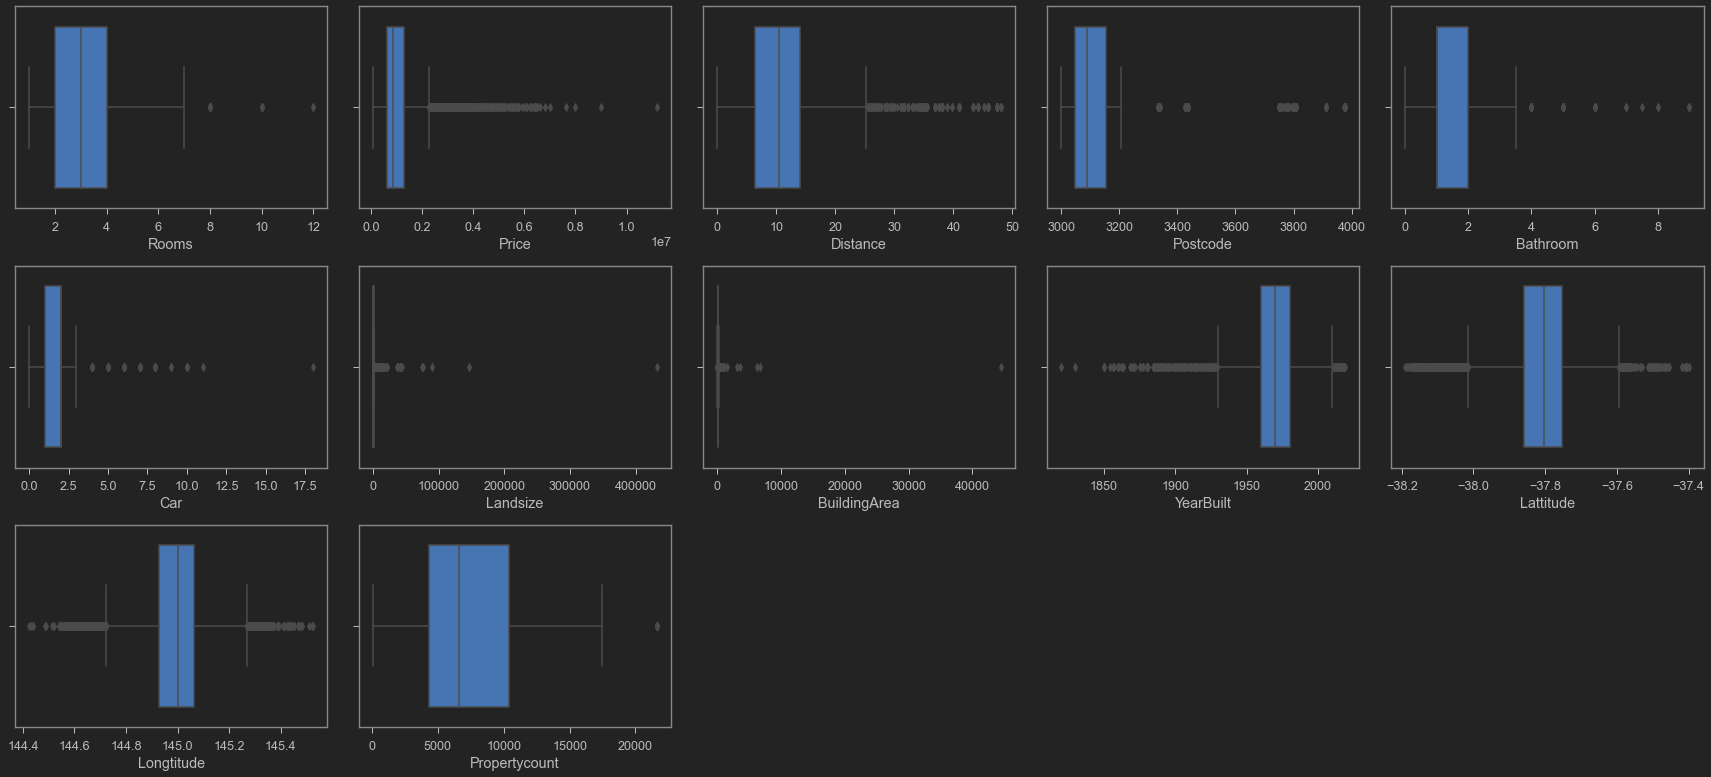

In [94]:
plt.figure(figsize=(24,14))
n = 1
for i in df_non_object.columns:
    plt.subplot(4,5,n)
    sns.boxplot(x=df1[i])
    n+=1
    
plt.tight_layout()
plt.show()


In [95]:
# Check Landsize 0 values

df2.loc[(df2['Landsize']==0)]

# Terlihat 2,535 rows memiliki landsize 0
# Untuk landsize 0 yang BuildingArea nya tidak missing values maka akan direplace dengan median berdasarkan Building Area dari tiap council Area

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [96]:
bldarea = df2.loc[(df2['BuildingArea']>0), 'BuildingArea'].unique()
ps5= df2.loc[(df2['Landsize']==0), 'CouncilArea'].unique()
for i in ps5:
    for j in range(len(bldarea)):
        df2.loc[(df2['Landsize']==0), 'Landsize'] = df2.loc[(df2['Landsize']==0), 'Landsize'].replace(0,df2.loc[(df2['CouncilArea']==i) & (df2['BuildingArea']==bldarea[j]) & (df2['Landsize']!=0), 'Landsize'].median())

# replace dengan median berdasarkan building area di masing-masing council area 

In [97]:
df2.loc[(df2['Landsize']==0)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [98]:
# Check Bathrooms 0 values

df2.loc[df2['Bathroom']==0]

# Terdapat rows yang memiliki values 0 pada kolom bathroom, hal yang cukup mustahil jika menjual rumah tanpa bathroom
# Maka 0 values akan di treat seperti missing values dan akan diisi dengan median berdasarkan jumlah kamar rumah tersebut

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [99]:
subs3 = df2.loc[(df2['Bathroom']==0),'Suburb'].unique()
for i in subs3:
    for j in df2.loc[(df2['Bathroom']==0),'Rooms'].unique():
        df2.loc[(df2['Suburb']==i) & (df2['Bathroom']==0) & (df2['Rooms']==j),'Bathroom'] = df2.loc[(df2['Suburb']==i) & (df2['Bathroom']==0) & (df2['Rooms']==j),'Bathroom'].replace(0,df2.loc[(df2['Suburb']==i) & (df2['Rooms']==j),'Bathroom'].median())
        
# Replace dengan median dari bathroom berdasarkan setiap suburb dan jumlah kamarnya

In [100]:
df2.loc[df2['Bathroom']==0] # Check ulang apakah masih ada values 0

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [103]:
df2.shape

(22185, 20)

In [101]:
# df2.to_csv('MelbourneClean.csv',index=False)

# Export file yang sudah dibersihkan